### Задание1. Обучите любую модель классификации на датасете IRIS до применения PCA и после него. Сравните качество классификации по отложенной выборке.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [3]:
X_ = X.astype(float)
rows, cols = X_.shape

In [4]:
means = X_.mean(0)
for i in range(rows):
    for j in range(cols):
        X_[i, j] -= means[j]

In [5]:
std = np.std(X_, axis=0)
for i in range(cols):
    for j in range(rows):
        X_[j][i] /= std[i]

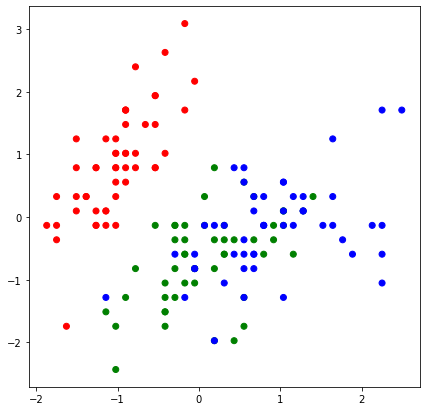

In [6]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X_[:, 0], X_[:, 1], c=y, cmap=cmap);

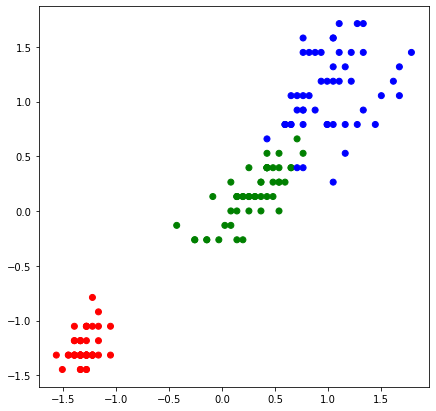

In [7]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X_[:, 2], X_[:, 3], c=y, cmap=cmap);

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_, y, test_size=0.2, random_state=1)

In [9]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)    

In [10]:
def knn(x_train, y_train, x_test, k):
    answers = []
    for x in x_test:
        test_distances = []
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            test_distances.append((distance, y_train[i]))
            
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
        
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers    

In [11]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [12]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    h = .02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [13]:
%%time
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 1.000
Wall time: 116 ms


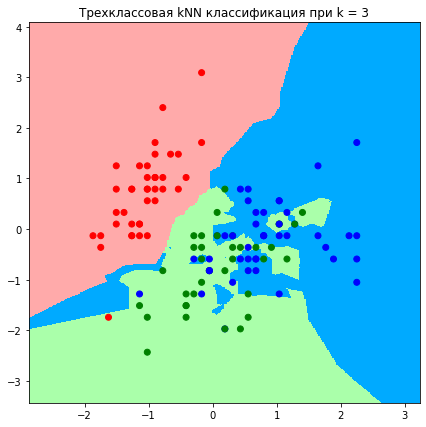

Wall time: 2min 36s


In [14]:
%%time
get_graph(X_train, y_train, k)

In [15]:
%%time
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.967
Wall time: 102 ms


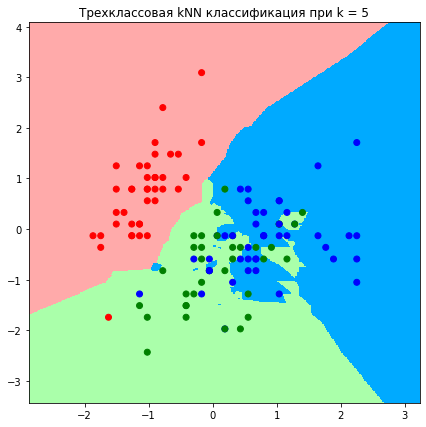

Wall time: 2min 37s


In [16]:
%%time
get_graph(X_train, y_train, k)

In [17]:
%%time
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 1.000
Wall time: 84 ms


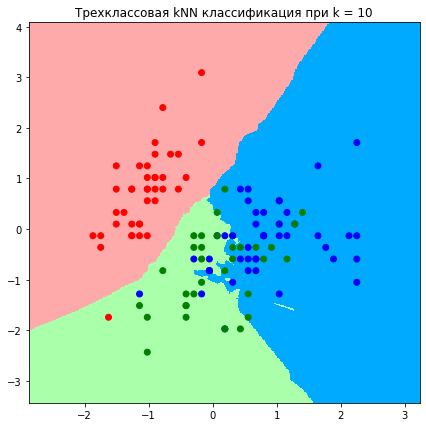

Wall time: 2min 41s


In [18]:
%%time
get_graph(X_train, y_train, k)

In [19]:
covariance_matrix = X_.T.dot(X_)
eig_values, eig_vectors = np.linalg.eig(covariance_matrix)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения в порядке убывания:')
for i in eig_pairs:
    print(i[0])

Собственные значения в порядке убывания:
437.77467247979905
137.10457072021043
22.01353133569721
3.1072254642928563


In [20]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описвыаемая каждой из компонент: \n{var_exp}')
print(f'Кумулятивная доля дисперсии по компонентам: \n{cum_var_exp}')

Доля дисперсии, описвыаемая каждой из компонент: 
[72.96244541329992, 22.85076178670176, 3.6689218892828714, 0.5178709107154765]
Кумулятивная доля дисперсии по компонентам: 
[ 72.96244541  95.8132072   99.48212909 100.        ]


In [21]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [22]:
Z = X_.dot(W)

In [23]:
Z_train, Z_test, y_train, y_test = model_selection.train_test_split(Z, y, test_size=0.2, random_state=1)

In [24]:
%%time
k = 3
y_pred = knn(Z_train, y_train, Z_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.967
Wall time: 62.5 ms


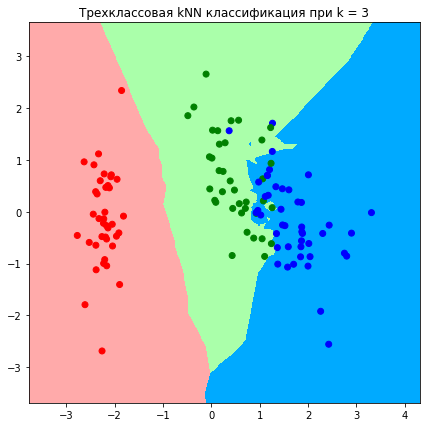

Wall time: 3min 20s


In [25]:
%%time
get_graph(Z_train, y_train, k)

In [26]:
%%time
k = 5
y_pred = knn(Z_train, y_train, Z_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.967
Wall time: 62.7 ms


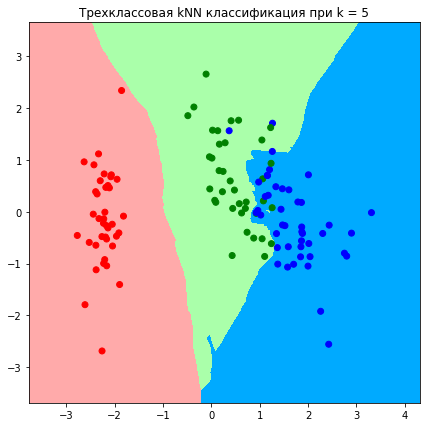

Wall time: 3min 32s


In [27]:
%%time
get_graph(Z_train, y_train, k)

In [28]:
%%time
k = 10
y_pred = knn(Z_train, y_train, Z_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.967
Wall time: 54.7 ms


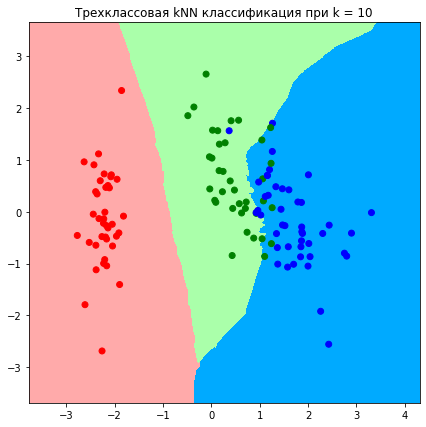

Wall time: 3min 28s


In [29]:
%%time
get_graph(Z_train, y_train, k)

#### При использовании алгоритма KNN при 3 соседях без PCA accurcy=1, после применения PCA accurcy=0.967.
#### При использовании алгоритма KNN при 5 соседях без PCA accurcy=0.967, после применения PCA accurcy=0.967.
#### При использовании алгоритма KNN при 10 соседях без PCA accurcy=1, после применения PCA accurcy=0.967.

### Задание 2. Напишите свою реализацию метода главных компонент посредством сингулярного разложения с использованием функции numpy.linalg.svd().

In [30]:
P, D, Q = np.linalg.svd(X_, full_matrices=False)
n_components = 2
D_diag = np.diag(D)
P_reduced = P[:, :n_components]
D_reduced = D_diag[:n_components, :n_components]
Q_reduced = Q[:, :n_components]
X_svd = np.dot(P_reduced, np.dot(D_reduced, Q_reduced.T))

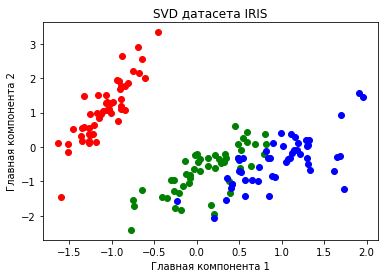

In [31]:
plt.figure()
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X_svd[y==i, 0], X_svd[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('SVD датасета IRIS')
plt.show()